# Visualize and Compare Outputs
1) Visualize Scenario

2) Compare Two Scenarios

3) Validate TDR Periods

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [67]:
# Set Parameters
infolder1 = "Results_without_retro"
infolder2 = "Results_with_retro"
scen1_name = "Without CCS Retrofits"
scen2_name = "With CCS Retrofits"
scenario_names = [scen1_name, scen2_name]

zones = ["MA", "CT", "ME"]

tech_zone_colors = {'ME_wind' : "deepskyblue", 
                    'MA_wind' : "lightskyblue", 
                    'CT_wind' : "lightblue",
                    'ME_solar_pv' : "goldenrod", 
                    'MA_solar_pv' : "gold", 
                    'CT_solar_pv' : "palegoldenrod", 
                    'ME_natural_gas' : "maroon", 
                    'MA_natural_gas_CCS_retro' : "deeppink",
                    'MA_natural_gas' : "firebrick", 
                    'CT_natural_gas' : "lightcoral" }
tech_zone_order = list(tech_zone_colors.keys())
tech_zone_order.reverse()

storage_zone_colors = {'ME_battery' : "dimgrey", 
                    'MA_battery' : "darkgrey", 
                    'CT_battery' : "lightgrey"}
storage_zone_order = list(storage_zone_colors.keys())
storage_zone_order.reverse()


### Scenario 1

In [68]:
# Read Non-Storage Capacity
capacity1 = pd.read_csv(os.path.join(infolder1, "capacity.csv"), usecols=['Resource', 'Zone','StartCap','EndCap'])
capacity1 = capacity1[capacity1.Resource != "Total"]
capacity1 = capacity1[~capacity1.Resource.str.contains("battery")]
print(capacity1)
print()

# Read Storage Capacity
storagecapacity1 = pd.read_csv(os.path.join(infolder1, "capacity.csv"), usecols=['Resource', 'Zone','StartEnergyCap','EndEnergyCap'])
storagecapacity1 = storagecapacity1[storagecapacity1.Resource != "Total"]
storagecapacity1 = storagecapacity1[storagecapacity1.Resource.str.contains("battery")]
print(storagecapacity1)
print()

# Read Costs
costs1 = pd.read_csv(os.path.join(infolder1, "costs.csv"), index_col="Costs")
cUnmetRsv = float(costs1.loc["cUnmetRsv","Total"])
cNetworkExp = float(costs1.loc["cNetworkExp","Total"])
costs1 = costs1.drop(["cTotal","cUnmetRsv","cNetworkExp"])
costs1 = costs1.drop(columns=["Total"],axis=1)
costs1["Zone1"] = pd.to_numeric(costs1["Zone1"])
costs1["Zone2"] = pd.to_numeric(costs1["Zone2"])
costs1["Zone3"] = pd.to_numeric(costs1["Zone3"])
costs1["cUnmetRsv"] = 0
costs1["cNetworkExp"] = 0
costs1 = costs1.append(pd.DataFrame([[0, 0, 0, cUnmetRsv, 0]], index=['cUnmetRsv'], columns=["Zone1","Zone2","Zone3","cUnmetRsv","cNetworkExp"]))
costs1 = costs1.append(pd.DataFrame([[0, 0, 0, 0, cNetworkExp]], index=['cNetworkExp'], columns=["Zone1","Zone2","Zone3","cUnmetRsv","cNetworkExp"]))

print(costs1)
print()

                   Resource  Zone  StartCap        EndCap
0            MA_natural_gas   1.0   14400.0   8614.061127
1  MA_natural_gas_CCS_retro   1.0       0.0      0.000000
2                   MA_wind   1.0     200.0  16746.011500
3               MA_solar_pv   1.0    1100.0   9664.246135
4            CT_natural_gas   2.0    9300.0   3486.025821
5                   CT_wind   2.0     100.0   3104.267564
6               CT_solar_pv   2.0     100.0   9124.484059
7            ME_natural_gas   3.0    2000.0    753.474554
8                   ME_wind   3.0    1700.0   8047.017707
9               ME_solar_pv   3.0     100.0    100.000000

      Resource  Zone  StartEnergyCap  EndEnergyCap
10  MA_battery   1.0             0.0  15943.323264
11  CT_battery   2.0             0.0   8935.854413
12  ME_battery   3.0             0.0    193.960694

                    Zone1         Zone2         Zone3  cUnmetRsv  cNetworkExp
cFix         3.881689e+09  1.716126e+09  9.863898e+08        0.0          0.0


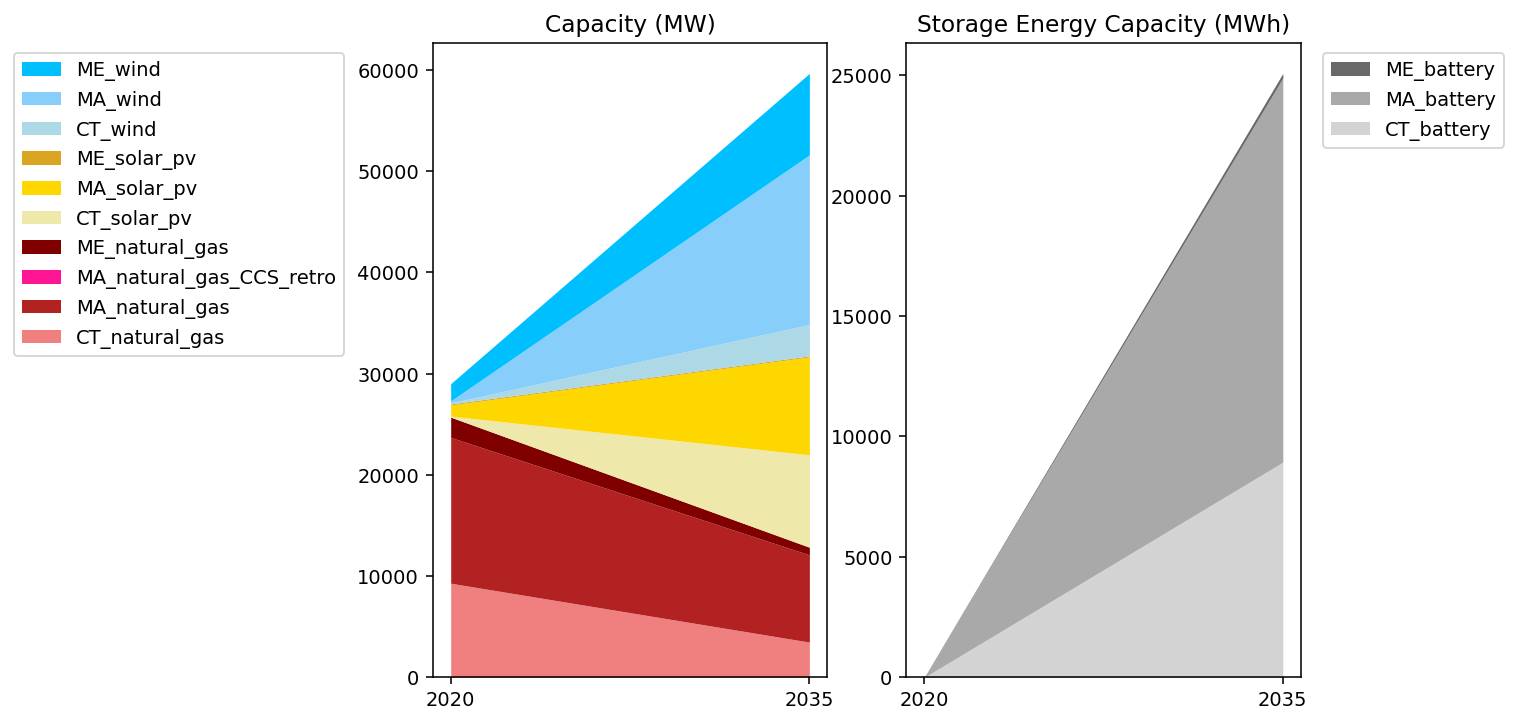

In [69]:
# Capacity Stacked Area Plot

# Non-storage Technologies 
X1 = capacity1[["StartCap","EndCap"]]
X1.index = capacity1.Resource
X1 = X1.T
X1.index = ["2020","2035"]
X1 = X1[tech_zone_order]
c = X1.columns.map(tech_zone_colors)

# Storage Technologies
S1 = storagecapacity1[["StartEnergyCap","EndEnergyCap"]]
S1.index = storagecapacity1.Resource
S1 = S1.T
S1.index = ["2020","2035"]
S1 = S1[storage_zone_order]
cs = S1.columns.map(storage_zone_colors)

fig, ax = plt.subplots(1, 2, figsize=(8,6))
plt.rcParams["figure.dpi"] = 140

X1.plot.area(color=c, ax=ax[0], linewidth=0)
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(["2020","2035"])
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(reversed(handles), reversed(labels),bbox_to_anchor=(-0.2,1))
ax[0].set_title("Capacity (MW)")

S1.plot.area(color=cs, ax=ax[1], linewidth=0)
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(["2020","2035"])
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.54,1))
ax[1].set_title("Storage Energy Capacity (MWh)")

plt.show()

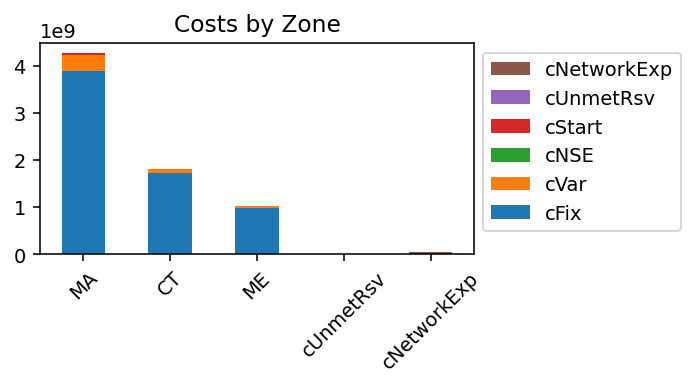

In [70]:
# Costs Plot
fig, ax = plt.subplots(figsize=(4,2))
plt.rcParams["figure.dpi"] = 140
costs1.T.plot.bar(stacked=True, ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.5,1))
ax.set_xticklabels(zones+["cUnmetRsv","cNetworkExp"])
plt.xticks(rotation = 45, fontsize=10)
plt.title("Costs by Zone")
plt.show()

In [71]:
costs1

,Zone1,Zone2,Zone3,cUnmetRsv,cNetworkExp
cFix,3.881689e+09,1.716126e+09,9.863898e+08,0.0,0.0
cVar,3.346541e+08,8.556739e+07,2.905682e+07,0.0,0.0
cNSE,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
cStart,5.329392e+07,1.355545e+07,4.040721e+06,0.0,0.0
cUnmetRsv,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
cNetworkExp,0.000000e+00,0.000000e+00,0.000000e+00,0.0,38522000.0


### Scenario 2

In [72]:
# Read Non-Storage Capacity
capacity2 = pd.read_csv(os.path.join(infolder2, "capacity.csv"), usecols=['Resource', 'Zone','StartCap','EndCap'])
capacity2 = capacity2[capacity2.Resource != "Total"]
capacity2 = capacity2[~capacity2.Resource.str.contains("battery")]
print(capacity2)
print()

# Read Storage Capacity
storagecapacity2 = pd.read_csv(os.path.join(infolder2, "capacity.csv"), usecols=['Resource', 'Zone','StartEnergyCap','EndEnergyCap'])
storagecapacity2 = storagecapacity2[storagecapacity2.Resource != "Total"]
storagecapacity2 = storagecapacity2[storagecapacity2.Resource.str.contains("battery")]
print(storagecapacity2)
print()

# Read Costs
costs2 = pd.read_csv(os.path.join(infolder2, "costs.csv"), index_col="Costs")
cUnmetRsv2 = float(costs2.loc["cUnmetRsv","Total"])
cNetworkExp2 = float(costs2.loc["cNetworkExp","Total"])
costs2 = costs2.drop(["cTotal","cUnmetRsv","cNetworkExp"])
costs2 = costs2.drop(columns=["Total"],axis=1)
costs2["Zone1"] = pd.to_numeric(costs2["Zone1"])
costs2["Zone2"] = pd.to_numeric(costs2["Zone2"])
costs2["Zone3"] = pd.to_numeric(costs2["Zone3"])
costs2["cUnmetRsv"] = 0
costs2["cNetworkExp"] = 0
costs2 = costs2.append(pd.DataFrame([[0, 0, 0, cUnmetRsv2, 0]], index=['cUnmetRsv'], columns=["Zone1","Zone2","Zone3","cUnmetRsv","cNetworkExp"]))
costs2 = costs2.append(pd.DataFrame([[0, 0, 0, 0, cNetworkExp2]], index=['cNetworkExp'], columns=["Zone1","Zone2","Zone3","cUnmetRsv","cNetworkExp"]))

print(costs2)
print()

                   Resource  Zone  StartCap       EndCap
0            MA_natural_gas   1.0   14400.0  3944.396801
1  MA_natural_gas_CCS_retro   1.0       0.0  8364.482559
2                   MA_wind   1.0     200.0  5442.474896
3               MA_solar_pv   1.0    1100.0  2000.000000
4            CT_natural_gas   2.0    9300.0  6846.107799
5                   CT_wind   2.0     100.0  4358.308329
6               CT_solar_pv   2.0     100.0   100.000000
7            ME_natural_gas   3.0    2000.0   685.943537
8                   ME_wind   3.0    1700.0  5978.705394
9               ME_solar_pv   3.0     100.0   100.000000

      Resource  Zone  StartEnergyCap  EndEnergyCap
10  MA_battery   1.0             0.0   2467.178917
11  CT_battery   2.0             0.0   2798.403909
12  ME_battery   3.0             0.0    734.417174

                    Zone1         Zone2         Zone3  cUnmetRsv  cNetworkExp
cFix         1.614852e+09  8.176599e+08  7.258775e+08        0.0          0.0
cVar       

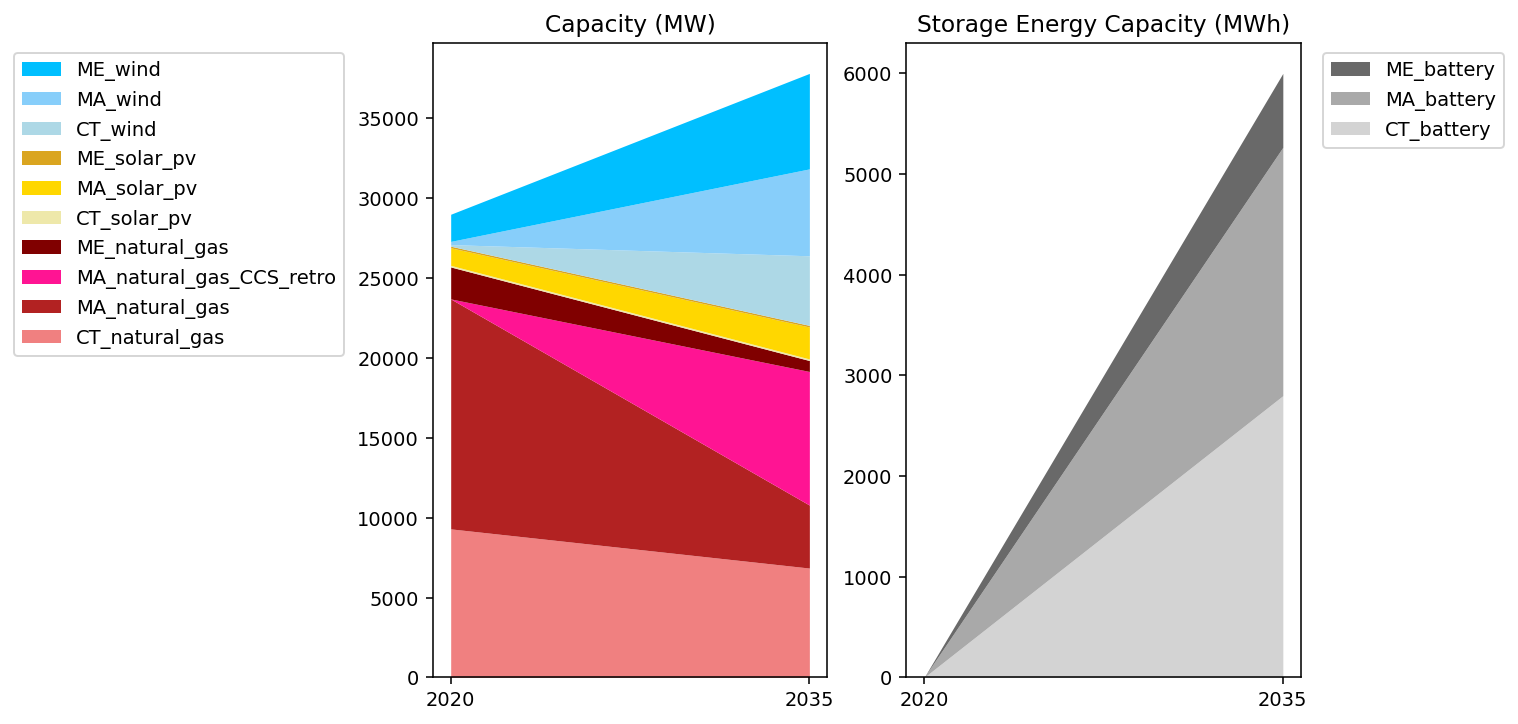

In [73]:
# Capacity Stacked Area Plot

# Non-storage Technologies 
X2 = capacity2[["StartCap","EndCap"]]
X2.index = capacity2.Resource
X2 = X2.T
X2.index = ["2020","2035"]
X2 = X2[tech_zone_order]
c = X2.columns.map(tech_zone_colors)

# Storage Technologies
S2 = storagecapacity2[["StartEnergyCap","EndEnergyCap"]]
S2.index = storagecapacity2.Resource
S2 = S2.T
S2.index = ["2020","2035"]
S2 = S2[storage_zone_order]
cs = S2.columns.map(storage_zone_colors)

fig, ax = plt.subplots(1, 2, figsize=(8,6))
plt.rcParams["figure.dpi"] = 140

X2.plot.area(color=c, ax=ax[0], linewidth=0)
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(["2020","2035"])
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(reversed(handles), reversed(labels),bbox_to_anchor=(-0.2,1))
ax[0].set_title("Capacity (MW)")

S2.plot.area(color=cs, ax=ax[1], linewidth=0)
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(["2020","2035"])
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.54,1))
ax[1].set_title("Storage Energy Capacity (MWh)")

plt.show()

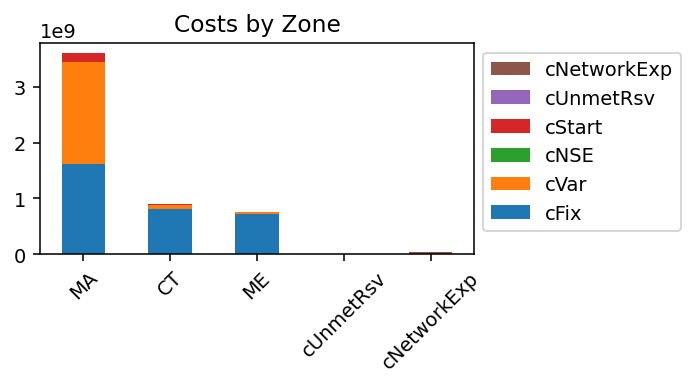

In [74]:
# Costs Plot
fig, ax = plt.subplots(figsize=(4,2))
plt.rcParams["figure.dpi"] = 140
costs2.T.plot.bar(stacked=True, ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.5,1))
ax.set_xticklabels(zones+["cUnmetRsv","cNetworkExp"])
plt.xticks(rotation = 45, fontsize=10)
plt.title("Costs by Zone")
plt.show()

In [75]:
costs2

,Zone1,Zone2,Zone3,cUnmetRsv,cNetworkExp
cFix,1.614852e+09,8.176599e+08,7.258775e+08,0.0,0.0
cVar,1.835318e+09,7.268403e+07,2.892761e+07,0.0,0.0
cNSE,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
cStart,1.551429e+08,1.799328e+07,4.328079e+06,0.0,0.0
cUnmetRsv,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
cNetworkExp,0.000000e+00,0.000000e+00,0.000000e+00,0.0,38522000.0


### Compare Scenarios

In [76]:
capacities = pd.merge(capacity1[['Resource','EndCap']], capacity2[['Resource','EndCap']], how='outer', on='Resource', suffixes=("_1","_2"))
capacities = capacities.fillna(0)
capacities = capacities.set_index("Resource")
capacities.columns = scenario_names
capacities

,Without CCS Retrofits,With CCS Retrofits
Resource,,
MA_natural_gas,8614.061127,3944.396801
MA_natural_gas_CCS_retro,0.000000,8364.482559
MA_wind,16746.011500,5442.474896
MA_solar_pv,9664.246135,2000.000000
CT_natural_gas,3486.025821,6846.107799
CT_wind,3104.267564,4358.308329
CT_solar_pv,9124.484059,100.000000
ME_natural_gas,753.474554,685.943537
ME_wind,8047.017707,5978.705394


<AxesSubplot:xlabel='Resource'>

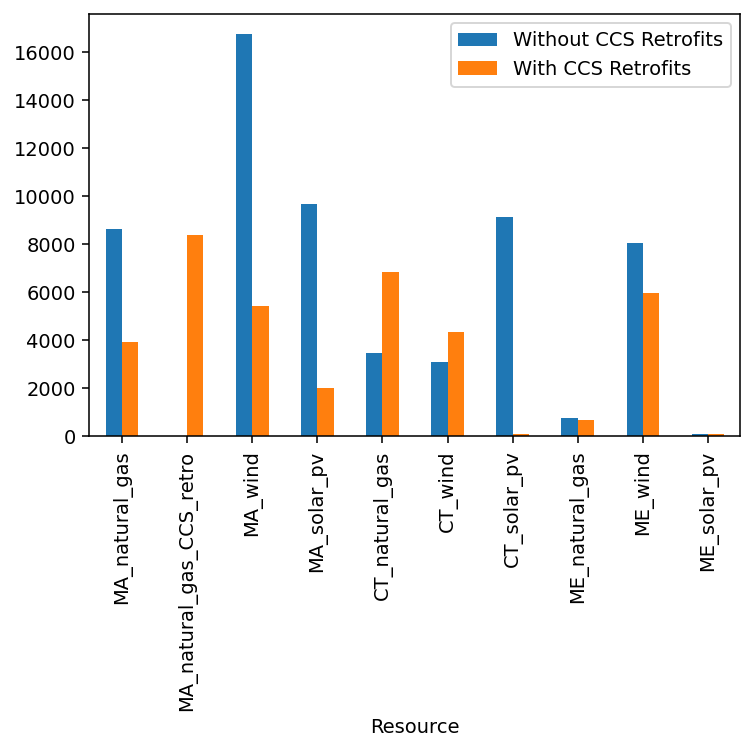

In [77]:
capacities.plot.bar()

In [58]:
totalcosts1 = costs1.sum(axis=1)
totalcosts1
costs = pd.DataFrame([costs1.sum(axis=1),costs2.sum(axis=1)]).T
costs.columns = scenario_names
costs

,With CCS Entry,Without CCS Entry
cFix,6.584205e+09,7.022298e+09
cVar,4.492783e+08,3.991837e+08
cNSE,0.000000e+00,0.000000e+00
cStart,7.089009e+07,6.302169e+07
cUnmetRsv,0.000000e+00,0.000000e+00
cNetworkExp,3.852200e+07,3.852200e+07


<AxesSubplot:>

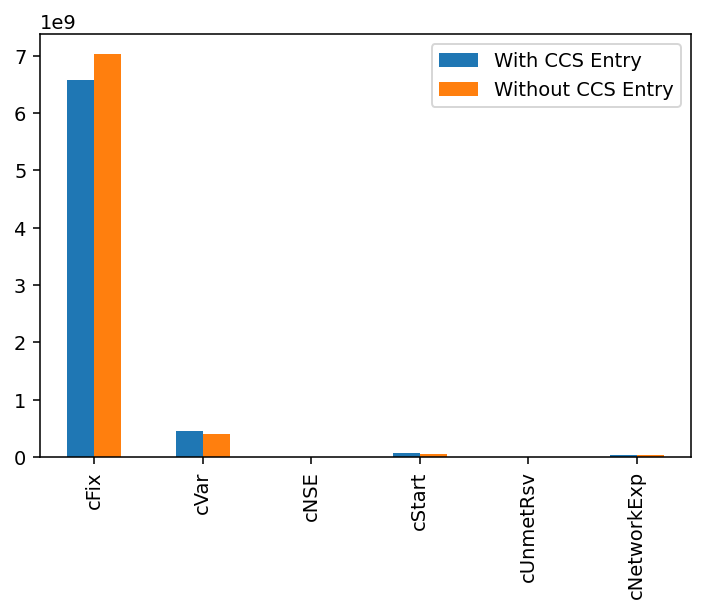

In [59]:
costs.plot.bar()